In [1]:
import cx_Oracle
import pandas as pd
db = cx_Oracle.connect("LMEMBER","lmember","localhost:1521/xepdb1")
cursor = db.cursor()
cursor.execute("select * from CATEGORY")
x = cursor.fetchall()
cat_df = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='CATEGORY'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
cat_df.columns = list1
cat_df.head()

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명
0,A,06,0601,A060143,스포츠,레드페이스
1,A,06,0601,A060144,스포츠,에코로바
2,A,06,0601,A060145,스포츠,웨스트우드
3,A,06,0601,A060146,스포츠,투스카로라
4,A,06,0601,A060147,스포츠,아크테릭스


In [2]:
cursor.close()
db.close()

In [8]:
cat_df['소분류코드'].describe()

count        4386
unique       4386
top       B451105
freq            1
Name: 소분류코드, dtype: object

In [11]:
cond1 = (cat_df['제휴사']=='A')&(cat_df['대분류코드']=='01')
cond2 = cat_df['제휴사']=='B'


cat_ab = cat_df[cond1|cond2]

In [22]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386 entries, 0 to 4385
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   제휴사       4386 non-null   object
 1   대분류코드     4386 non-null   object
 2   중분류코드     4386 non-null   object
 3   소분류코드     4386 non-null   object
 4   중분류명      4386 non-null   object
 5   소분류명      4386 non-null   object
 6   isFood_B  4386 non-null   bool  
dtypes: bool(1), object(6)
memory usage: 210.0+ KB


In [20]:
cond3 = (cat_df['제휴사']=='C')&(cat_df['대분류코드']=<'15')
cond3

SyntaxError: invalid syntax (<ipython-input-20-f7e211ae54b2>, line 1)

0       False
1       False
2       False
3       False
4       False
        ...  
4381    False
4382    False
4383    False
4384    False
4385    False
Name: 제휴사, Length: 4386, dtype: bool

In [12]:
cat_ab.describe()

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명
count,2762,2762,2762,2762,2762,2762
unique,2,92,634,2762,589,2405
top,B,01,0106,B330101,가공식품,브랜드
freq,2624,160,55,1,55,8


In [13]:
cat_ab.head(20)

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명
190,B,01,0101,B010101,열매채소,가지
191,B,01,0101,B010102,열매채소,고추
192,B,01,0101,B010103,열매채소,구색 호박
193,B,01,0101,B010104,열매채소,기타열매채소
194,B,01,0101,B010105,열매채소,단호박
195,B,01,0101,B010106,열매채소,애호박
196,B,01,0101,B010107,열매채소,여주
197,B,01,0101,B010108,열매채소,오이
198,B,01,0101,B010109,열매채소,옥수수
199,B,01,0101,B010110,열매채소,친환경열매채소


A대분류 01, 맨 위 6개 row는 삭제(아직 삭제 안했음.)

B대분류 01,02,03,04,05,06,07,
09,10,11,12,13,14,15,16,
37,38,
43,
46,47,48,
52~65,
67,
72~83,89,91~92

C대분류 01~15

In [85]:
import cx_Oracle
import pandas as pd
db = cx_Oracle.connect("LMEMBER","lmember","localhost:1521/xepdb1")
cursor = db.cursor()
cursor.execute("select * from FOOD_ABC")
x = cursor.fetchall()
food_abc = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='CATEGORY'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
food_abc.columns = list1
food_abc.head()

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명
0,B,01,0101,B010101,열매채소,가지
1,B,01,0101,B010102,열매채소,고추
2,B,01,0101,B010103,열매채소,구색 호박
3,B,01,0101,B010104,열매채소,기타열매채소
4,B,01,0101,B010105,열매채소,단호박


In [86]:
cursor.close()
db.close()

In [87]:
def categorize(value):
    if value in ['육류', '축산가공', '육포', '마른안주선물세트', '우육', '수입육', '일반한우', '브랜드한우', '닭고기', '계란', '오리고기', '양념육', '돼지고기', '브랜드돼지고기', '차별화돼지고기', '온라인돼지고기', '미국산소고기', '호주산소고기', '수입돼지고기', '기타국소고기','가공란', '계란류', '국내산우육', '국내산돈육', '국내산계육', '수입우육', '수입돈육', '기타축산']:
        return '육류'
    
    elif value in ['건과','LOCAL잎채소','LOCAL김치채소','가공양곡','농산물', '열매채소', '버섯', '온라인버섯/열매채소', '양곡', '잡곡류', '즉석도정미', '잎채소', '뿌리채소', '열매채소', '버섯류', '샐러드채소', '약초', '양념류', '친환경채소', '김치채소', '온라인잎/샐러드채소', 'LOCAL잎채소', '샐러드/간편채소', '가루', '식자재', '나물', '콩나물', '두부', '간편채소', '과실과일', '과채과일', '친환경과일', '감귤', '감', '복숭아', '자두', '토마토', '포도', '참외', '수박', '딸기', '메론', '수입감귤과일', '수입기타과일', '열대과일','키위/석류', '포도/체리', '오렌지', '자몽', '오렌지과일기타', '석류', '레몬', '견과', '블루베리', '체리', '수입포도', '냉동과일', '열대과일기타','바나나', '파인애플', '망고', '키위', '잡곡', '선식', '온라인잡곡선식', '양념채소', '뿌리채소', '온라인양념/뿌리채소','사과', '배', '온라인저장과일', '구색과일', '밤', '국산과일', '수입과일', '냉동과일', '건과일', '견과류', '양곡', '잡곡', '선식류', '엽채류', '과채류', '근채류', '두채류', '김치채소류', '버섯류','양채류', '나물류']:
        return '농산물'
    
    elif value in ['수입갈치','국산게/갈치','수산품', '대중선어', '냉동수산물', '고등어/삼치', '대구', '도미/민어', '기타구색생선', '꽁치/가자미', '오징어', '조기/명태', '국산게', '즉석구이안주', '마른안주', '멸치건명태', '해조류', '특산물', '건오징어', '조미오징어', '쥐치포', '해초류', '생선회', '해물연체류', '간편조리생선','기타회', '즉석구이안주', '특산물행사', '수입연어', '수입고등어', '수입게', '수입기타생선','냉동규격생선', '냉동규격해물', '냉장규격생선', '온라인규격/간편조리생선', '규격RTC', '간편조리행사', '굴비', '반건생선', '해초', '조개', '조개살', '연체', '새우', '온라인해물연체', '특산물행사','멸치', '천연조미료', '황태', '미역/다시마', '즉석구이김', '마른김', '조미김', '김가공품', '선어류', '선어가공', '건어류', '건어가공', '해물류', '기타수산']:
        return '수산물'
    
    elif value in ['유제품', '냉장식사MS','먹거리행사','간식','가공식품', '젓갈/반찬', '건강식품', '조리반찬', '시즌반찬', '포장젓갈', '포장반찬', '베이커리', '구이', '튀김', '밥류', '구이찜조리', '반찬류', '대용식', '이벤트조리', '간식조리','간편조리', '튀김조리', '피자', '브랜드빵', '치즈', '디저트', '유가공', '간편조리식품', '라면', '면류', '분유', '잼', '통조림', '이유식/유아간식', '건강식품', '꿀', '스낵', '비스켓', '파이', '시리얼', '캔디', '초콜릿', '껌', '안주', '한과', '프리미엄과자', '간식용과자', '수입과자', '종합과자', '전통과자', '묵', '묵/즉석참기름', '어묵맛살', '냉장면류', '햄소시지','냉장반찬', '냉동만두', '냉동간식', '냉동대용식', '아이스크림', '햄', '소시지', '냉장햄세트','생선초밥','냉동가공', '생활한방', '한방식재류', '한방차', '밥류', '간편조리', '김/초밥','도시락', '간편조리', '떡', '족발', '순대', '단무지류', '김치류', '반찬류', '젓갈류', '브랜드푸드몰', '간식조리','빵', '피자', '반찬', '전통간식', '먹거리', '시즌행사', '맛집행사', '포장반찬HMR', '냉동HMR', '냉장간편식HMR', '냉장식사HMR','라면', '면류', '간편요리', '밥죽류', '브랜드빵', '시리얼', '비타민', '기능성건강', '홍인삼', '육가공품','조미료', '소스류', '장류', '식용유지', '조미선물세트', '향신료', '액상조미료', '복합조미료', '소금/설탕류', '수입조미', '즉석참기름', '반찬류', '간편간식', '식사류', '베이커리', '기타조리식품', '치즈버터', '냉장농산', '냉장수산', '냉장축산', '아이스크림', '만두', '냉장간식MS', '냉장기타MS', '냉동MS', '병통조림', '분유', '즉석식품', '가공건식품', '가공분말류', '라면', '건면', '쿠키케이크','스낵', '캔디껌류', '초콜렛', '전통과자', '씨리얼', '장류', '식용유', '조미료', '케첩마요네즈', '감미료']:
        return '가공식품'
    
    elif value in ['담배','주류', '소주', '맥주', '와인', '전통주', '양주', '소주', '맥주', '와인', '양주', '전통주', '기타음주류']:
        return '주류'
    
    elif value in ['차/커피','냉장음료', '흰우유', '가공우유', '요구르트', '두유', '커피', '차', '인스턴트커피', '원두커피', '시즌차', '생수', '과채음료', '두유', '탄산음료', '이온음료', '커피차음료', '기능성음료', '수입음료','우유', '발효유', '냉장음료', '생수', '탄산음료', '과채음료', '커피음료', '차음료', '기능성음료', '두유', '커피류', '차류']:
        return '음료'
    
    else:
        return ' '

In [88]:
food_abc['간략분류'] = food_abc['중분류명'].apply(lambda x:categorize(x))

In [89]:
def gift_set_cat(cat_value ,s_value):
    if s_value in ['선어세트','해물선물세트','멸치선물세트' ,'마른안주 선물세트', '해조류세트', '멸치황태세트', '규격갈치선물세트', '규격옥돔선물세트', '규격고등어선물세트', '규격기타생선선물세트', '굴비세트', '기타해물선물세트', '전복선물세트', '멸치세트', '김선물세트']:
        return '수산물'
    elif s_value in ['오렌지과일선물세트','열대과일선물세트','배세트', '사과배세트', '사과세트','친환경과일세트', '혼합세트', '배세트', '혼합세트', '사과세트', '기타과일세트', 'PB세트', '친환경과일선물세트', '키위세트', '기타수입과일세트', '견과선물세트', '약용버섯세트', '더덕세트']:
        return '농산물'
    elif s_value in ['통조림선물세트', '혼합선물세트','온라인 선물세트','유제품', '화과자','인삼세트', '한방세트', '더덕세트', '건강기능성선물세트', '홍삼선물세트', '양념류선물세트', '과자선물세트', ]:
        return '가공식품'
    elif s_value in ['한우냉동선물세트','한우냉장선물세트','수입냉동선물세트', '수입냉장선물세트','한우선물세트','수입소고기선물세트', '햄선물세트']:
        return '육류'
    elif s_value in ['커피선물세트','차선물세트']:
        return '음료'
    else:
        return cat_value

In [90]:
food_abc['간략분류'] = food_abc.apply(lambda x:gift_set_cat(x['간략분류'], x['소분류명']), axis=1)

In [91]:
# mask 씌울 항목 선정
mask = food_abc['중분류명'].isin(['기타', '브랜드조리','데일리처분','분식','양식','일식','중식','한식','패스트푸드','레스토랑','카페','푸드코트','컨세션']) 
food_abc = food_abc[~mask] # ~를 포함하게 되면 mask의 값을 제외, ~을 제외하면 mask의 값을 포함입니다.

In [92]:
food_abc['간략분류'].value_counts()

가공식품    714
농산물     602
수산물     349
육류      171
음료      148
주류       51
Name: 간략분류, dtype: int64

In [93]:
let_me_see = food_abc['간략분류']==' '
food_abc[let_me_see]

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명,간략분류


In [94]:
food_abc

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명,간략분류
0,B,01,0101,B010101,열매채소,가지,농산물
1,B,01,0101,B010102,열매채소,고추,농산물
2,B,01,0101,B010103,열매채소,구색 호박,농산물
3,B,01,0101,B010104,열매채소,기타열매채소,농산물
4,B,01,0101,B010105,열매채소,단호박,농산물
...,...,...,...,...,...,...,...
2090,B,80,8002,B800201,멸치,국물용멸치,수산물
2091,B,80,8002,B800202,멸치,볶음용멸치,수산물
2092,B,80,8002,B800203,멸치,볶음조림용멸치,수산물
2093,B,80,8002,B800204,멸치,새우홍합,수산물


In [98]:
food_abc.to_csv('dataset/food_abc.csv', sep=',', na_rep='NaN',encoding='utf-8-sig')

In [99]:
import cx_Oracle
import pandas as pd
db = cx_Oracle.connect("LMEMBER","lmember","localhost:1521/xepdb1")
cursor = db.cursor()
cursor.execute("select * from PRICES")
x = cursor.fetchall()
prices = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='PRICES'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
prices.columns = list1
prices.head()

,소분류코드,평균금액
0,B270308,10906.80
1,B160101,3778.05
2,B240104,6369.11
3,B050901,2925.99
4,B060105,5672.90


In [100]:
cursor.close()
db.close()

In [101]:
prices.describe()

,평균금액
count,4.386000e+03
mean,5.884371e+04
std,2.190172e+05
min,8.984000e+01
25%,5.429075e+03
50%,1.016147e+04
75%,2.830877e+04
max,5.004584e+06


In [104]:
import numpy as np
print("평균값:",np.mean(prices['평균금액']))
print("중앙값:",np.median(prices['평균금액']))

평균값: 58843.70512995896
중앙값: 10161.470000000001


(array([4.29e+03, 6.60e+01, 8.00e+00, 1.10e+01, 5.00e+00, 1.00e+00,
        0.00e+00, 2.00e+00, 1.00e+00, 2.00e+00]),
 array([8.98400000e+01, 5.00539300e+05, 1.00098876e+06, 1.50143822e+06,
        2.00188768e+06, 2.50233714e+06, 3.00278660e+06, 3.50323606e+06,
        4.00368552e+06, 4.50413498e+06, 5.00458444e+06]),
 <BarContainer object of 10 artists>)

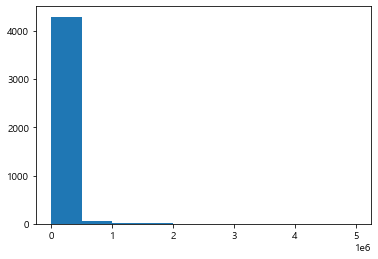

In [105]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "dataset/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

plt.hist(prices['평균금액'])

(array([583., 700., 168.,   0., 334.,  45.,   0., 150.,  49.,   6.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

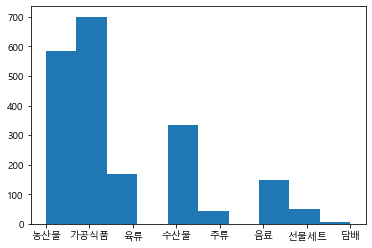

In [57]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_path = "dataset/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

plt.hist(food_abc['간략분류'])

In [28]:
food_abc.describe()

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명
count,2101,2101,2101,2101,2101,2101
unique,3,52,342,2101,355,1639
top,B,01,0106,B830101,가공식품,초밥
freq,1353,214,55,1,55,6


In [7]:
c_index = (food_abc['제휴사']=='C')

food_abc[c_index]

TypeError: '(     제휴사 대분류코드 중분류코드    소분류코드   중분류명   소분류명
1341   C    01  0101  C010101   국산과일     사과
1342   C    01  0101  C010102   국산과일      배
1343   C    01  0101  C010103   국산과일      감
1344   C    01  0101  C010104   국산과일     귤류
1345   C    01  0101  C010105   국산과일  유자/모과
...   ..   ...   ...      ...    ...    ...
1946   C    05  0501  C050102  국내산우육   한우등심
1947   C    05  0501  C050103  국내산우육   한우채끝
1948   C    05  0501  C050104  국내산우육   한우목심
1949   C    05  0501  C050105  국내산우육  한우앞다리
1950   C    05  0501  C050106  국내산우육   한우우둔

[610 rows x 6 columns], '소분류명')' is an invalid key

In [9]:
def category(value):
    if value>='A010101' and value<='A010106':
        return '생활'
    elif value>='A010201' and value<='A010521':
        return '농수산물'
    elif value>='A010601' and value<='A011004':
        return '가공식품'
    elif value>='A011101' and value<='A011109':
        return '입점매장'
    elif value>='A020101' and value<='A020214':
        return '의류액세서리'
    elif value>='A020301' and value<='A020312':
        return '미용'
    elif value>='A020401' and value<='A030111':
        return '의류액세서리'
    elif value>='A030112' and value<='A030114':
        return '서적문구완구'
    elif value>='A040201' and value<='A050632':
        return '의류액세서리'
    elif value>='A060101' and value<='A060252':
        return '스포츠'
    elif value>='A070101' and value<='A070608':
        return '가구가전'
    elif value>='A080101' and value<='A080125':
        return '의류액세서리'
    elif value>='A090101' and value<='A090110':
        return '생활'   
    elif value>='A090201' and value<='A090202':
        return '서적문구완구'
    elif value>='A090301' and value<='A090407':
        return '생활'
    elif value>='A090501' and value<='A090701':
        return '가구가전'
    elif value>='B010101' and value<='B010301':
        return '농수산물'
    elif value>='B020101' and value<='B030204':
        return '가공식품'
    elif value>='B040101' and value<='B071101':
        return '농수산물'
    elif value>='B080101' and value<='B090103':
        return '입점매장'
    elif value>='B090201' and value<='B160507':
        return '가공식품'
    elif value>='B170101' and value<='B190107':
        return '생활'
    elif value>='B190201' and value<='B190906':
        return '미용'
    elif value>='B200101' and value<='B220601':
        return '생활'
    elif value>='B220701' and value<='B230503':
        return '가구'
    elif value>='B240101' and value<='B250603':
        return '서적문구완구'
    elif value>='B260101' and value<='B260114':
        return '생활'
    elif value>='B260201' and value<='B261006':
        return '서적문구완구'
    elif value>='B270101' and value<='B270709':
        return '생활'
    elif value>='B280101' and value<='B281004':
        return '스포츠'
    elif value>='B281101' and value<='B281106':
        return '생활'
    elif value>='B281201' and value<='B281301':
        return '스포츠'
    elif value>='B290101' and value<='B320205':
        return '의류액세서리'
    elif value>='B320301' and value<='B320304':
        return '스포츠'
    elif value>='B320401' and value<='B330803':
        return '의류액세서리'
    elif value>='B340101' and value<='B340410':
        return '미용'
    elif value>='B350101' and value<='B360802':
        return '스포츠'
    elif value>='B370101' and value<='B371003':
        return '입점매장'
    elif value>='B380101' and value<='B380802':
        return '농수산물'
    elif value>='B390101' and value<='B421301':
        return '가구가전'
    elif value>='B430101' and value<='B431101':
        return '가공식품'
    elif value>='B440101' and value<='B451901':
        return '의류액세서리'
    elif value>='B460101' and value<='B480501':
        return '농수산물'
    elif value>='B490101' and value<='B500201':
        return '의류액세서리'
    elif value>='B500301' and value<='B510309':
        return '스포츠'
    elif value>='B510401' and value<='B510503':
        return '의류액세서리'
    elif value>='B520101' and value<='B550308':
        return '농수산물'
    elif value>='B550401' and value<='B630602':
        return '가공식품'
    elif value>='B630701' and value<='B650601':
        return '농수산물'
    elif value>='B660101' and value<='B660805':
        return '미용'    
    elif value>='B670101' and value<='B670405':
        return '입점매장'
    elif value>='B680101' and value<='B710103':
        return '의류액세서리'
    elif value>='B710201' and value<='B710304':
        return '스포츠'
    elif value>='B720101' and value<='B720301':
        return '농수산물'
    elif value>='B730101' and value<='B750502':
        return '가공식품'
    elif value>='B760101' and value<='B830104':
        return '농수산물'
    elif value>='B830201' and value<='B830205':
        return '가공식품'
    elif value>='B840101' and value<='B840406':
        return '생활'
    elif value>='B850101' and value<='B850204':
        return '가구가전'
    elif value>='B860101' and value<='B870703':
        return '생활'
    elif value>='B880101' and value<='B880302':
        return '가구가전'
    elif value>='B890101' and value<='B890202':
        return '농수산물'
    elif value>='B900101' and value<='B900401':
        return '미용'
    elif value>='B910101' and value<='C050605':
        return '농수산물'
    elif value>='C060101' and value<='C150802':
        return '가공식품'
    elif value>='C160101' and value<='C160409':
        return '생활'
    elif value>='C160501' and value<='C160919':
        return '미용' 
    elif value>='C160920' and value<='C170223':
        return '생활'
    elif value>='C170301' and value<='C170357':
        return '가구가전'
    elif value>='C170401' and value<='C170438':
        return '의류액세서리'
    elif value>='C170501' and value<='C170513':
        return '생활'
    elif value>='C170514' and value<='C170535':
        return '스포츠'
    elif value>='C170601' and value<='C170701':
        return '서적문구완구'
    elif value>='D010101' and value<='D020504':
        return '미용'
    elif value>='D030101' and value<='D030103':
        return '스포츠'
    elif value>='D030201' and value<='D030301':
        return '가공식품'
    elif value>='D030302' and value<='D030306':
        return '생활'
    elif value>='D040101' and value<='D040223':
        return '가공식품'
    elif value>='D050101' and value<='D050205':
        return '생활'
    elif value>='D050301' and value<='D050302':
        return '가구가전'
    elif value>='D060101' and value<='D060109':
        return '미용'
    elif value>='D060201' and value<='D060203':
        return '의류액세서리'
    elif value>='D060301' and value<='D060801':
        return '생활'
    elif value>='D070101' and value<='D080401':
        return '미용'
    else:
        return ' '

In [10]:
cat_df['상품카테고리'] = cat_df['소분류코드'].apply(lambda x:category(x))
cat_df

,제휴사,대분류코드,중분류코드,소분류코드,중분류명,소분류명,상품카테고리
0,A,06,0601,A060143,스포츠,레드페이스,스포츠
1,A,06,0601,A060144,스포츠,에코로바,스포츠
2,A,06,0601,A060145,스포츠,웨스트우드,스포츠
3,A,06,0601,A060146,스포츠,투스카로라,스포츠
4,A,06,0601,A060147,스포츠,아크테릭스,스포츠
...,...,...,...,...,...,...,...
4381,D,04,0402,D040222,음료,코코아,가공식품
4382,D,04,0402,D040223,음료,아이스티,가공식품
4383,D,05,0501,D050101,화장지/티슈,롤티슈,생활
4384,D,05,0501,D050102,화장지/티슈,각티슈/미용티슈,생활


In [12]:
cat_df['상품카테고리'].value_counts()

농수산물      1124
가공식품       931
의류액세서리     649
생활         506
스포츠        314
미용         246
가구가전       228
서적문구완구     224
입점매장       108
가구          56
Name: 상품카테고리, dtype: int64

생활, 농수산물 ,가공식품 ,의류액세서리 ,미용 ,스포츠(특이사항: 자동차용품도 스포츠에 포함) ,가구가전 ,입점매장(제휴사 건물에 입점한 타 브랜드의 독립 매장) ,서적문구완구 로 상품카테고리를 대분류함

In [5]:
db = cx_Oracle.connect("LMEMBER","lmember","localhost:1521/xepdb1")
cursor = db.cursor()
cursor.execute("select * from CHANNEL")
x = cursor.fetchall()
chan_df = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='CHANNEL'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
chan_df.columns = list1
chan_df.head()

,고객번호,제휴사,이용횟수
0,03354,B_MOBILE/APP,2
1,03358,C_MOBILE/APP,1
2,03360,B_MOBILE/APP,5
3,03364,A_MOBILE/APP,1
4,03366,B_MOBILE/APP,7


In [6]:
cursor.close()
db.close()

In [7]:
db = cx_Oracle.connect("LMEMBER","lmember","localhost:1521/xepdb1")
cursor = db.cursor()
cursor.execute("select * from COMPETITOR")
x = cursor.fetchall()
comp_df = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='COMPETITOR'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
comp_df.columns = list1
comp_df.head()

,고객번호,제휴사,경쟁사,이용년월
0,06247,D,D02,201507
1,06247,D,D02,201510
2,06247,D,D02,201511
3,06250,D,D01,201503
4,06260,D,D02,201502


In [8]:
cursor.close()
db.close()

In [9]:
db = cx_Oracle.connect("LMEMBER","lmember","localhost:1521/xepdb1")
cursor = db.cursor()
cursor.execute("select * from CUSTOMER")
x = cursor.fetchall()
cust_df = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='CUSTOMER'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
cust_df.columns = list1
cust_df.head()

,고객번호,성별,연령대,거주지역
0,00751,M,60세이상,100
1,00752,M,60세이상,440
2,00753,F,60세이상,060
3,00754,F,60세이상,055
4,00755,F,60세이상,100


In [10]:
cursor.close()
db.close()

In [11]:
db = cx_Oracle.connect("LMEMBER","lmember","localhost:1521/xepdb1")
cursor = db.cursor()
cursor.execute("select * from MEMBERSHIP")
x = cursor.fetchall()
mem_df = pd.DataFrame(x)
cursor.execute("select column_name from user_tab_columns where table_name='MEMBERSHIP'")
col = cursor.fetchall()
list1 = []
for i in col:
    for j in i:
        list1.append(j)
mem_df.columns = list1
mem_df.head()

,고객번호,멤버십명,가입년월
0,02538,하이마트,201509
1,02543,다둥이,201303
2,02545,하이마트,201504
3,02549,하이마트,201404
4,02550,다둥이,201403


In [12]:
cursor.close()
db.close()